In [1]:
import os
c = os.getcwd()
os.chdir("../")
from Flocking import *
from graph_utils import *
os.chdir(c)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def get_net(Q):
    G = nx.Graph()

    for i in range(0,N):
        for j in range(0,N):
            if (np.linalg.norm(Q[i,:]-Q[j,:])<r):
                if(not G.has_edge(i,j)):
                    G.add_edge(i,j)
    return(G)

def rho_h(z,h=0.2):
    if (0 <= z and z < h):
        return 1
    if (h <= z and z <= 1):
        return (1/2)*(1+np.cos(np.pi*(z-h)/(1-h)))
    else:
        return 0
    
def sigma_norm(z,epsilon=0.1):
    return (1/epsilon)*(np.sqrt(1+epsilon*(np.linalg.norm(z))**2)-1)

def sigma_grad(z,epsilon=0.1):
    return z/(1+epsilon*sigma_norm(z,epsilon))

def sigma_1(z):
    return z/(np.sqrt(1+z**2))

def phi(z,a=5,b=5):
    c = np.abs(a-b)/(np.sqrt(4*a*b))
    return (1/2)*((a+b)*sigma_1(z+c)+(a-b))

def phi_alpha(z,d,r):
    r_alpha = sigma_norm(r)
    d_alpha = sigma_norm(d)
    return rho_h(z/r_alpha)*phi(z-d_alpha)

def P_dot(Q,G):
    u = np.zeros((len(G),2))
    A = nx.adjacency_matrix(G).todense()
    for i in G.nodes():
        for j in G.neighbors(i):
            u[i] = u[i] + phi_alpha(sigma_norm(Q[j,:]-Q[i,:]),d,r)*(sigma_grad(Q[j,:]-Q[i,:]))
            u[i] = u[i] + A[i,j]*(Q[j,:]-Q[i,:])
    return u

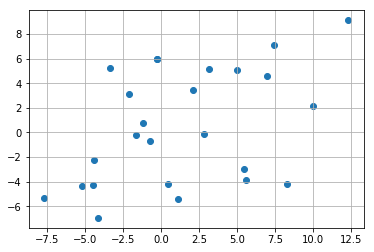

In [22]:
N=25
d=7
r=1.2*d
h=0.2
Q = np.sqrt(25)*np.random.randn(N,2)
P = (10)*np.random.rand(N,2)-1
plt.scatter(Q[:,0],Q[:,1])
plt.grid()

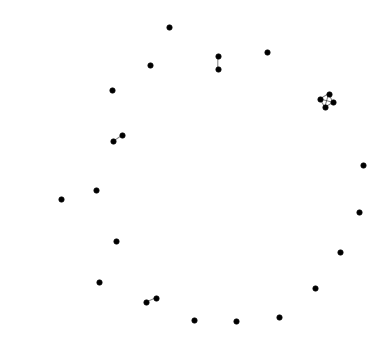

In [15]:
G = get_net(Q)
p=draw_graph(G,node_size=25,fig_size=6)

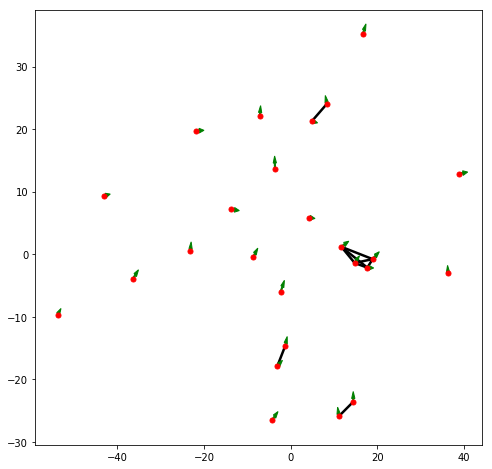

In [16]:
F = Flock(P_dot,
          number_of_agents=25,
          initial_position=Q,
          initial_velocity=P)

p = F.plot(Graph=True)

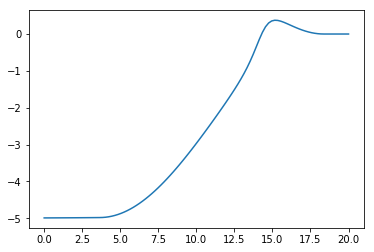

In [5]:
z = np.linspace(0,20,100)
y = np.zeros(len(z))
for i in range(0,len(y)):
    y[i] = phi_alpha(z[i],d,r)
    
plt.plot(z,y)

In [6]:
def time_step(Q,P,dt=0.01):
    G = get_net(Q)
    P = P + dt*P_dot(Q,G)
    Q = Q + dt*P
    return Q,P

In [7]:
T=10
dt=0.01
t=0
while t<T:
    Q,P = time_step(Q,P)
    t = t+dt

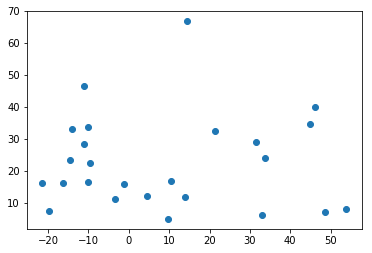

In [8]:
plt.scatter(Q[:,0],Q[:,1])

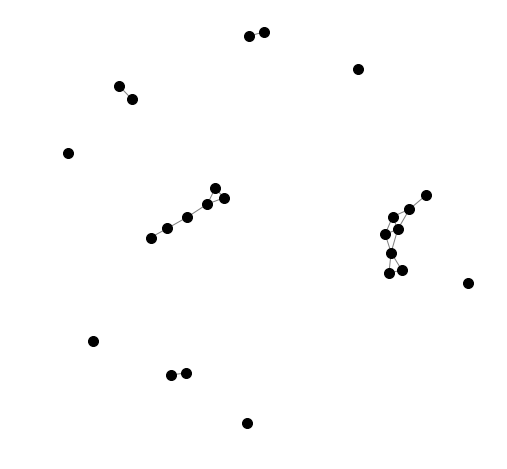

In [9]:
p=draw_graph(get_net(Q))

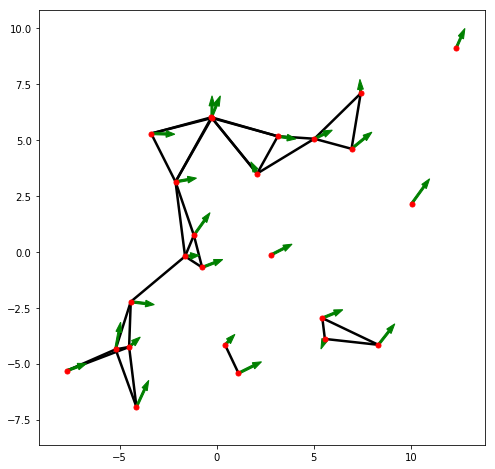

In [28]:
F = Flock(P_dot,
          number_of_agents=25,
          initial_position=Q,
          initial_velocity=P,
          inter_agent_distance=3)

p = F.plot(arrow_width=0.1)

In [ ]:
F.run_sim(T=50)

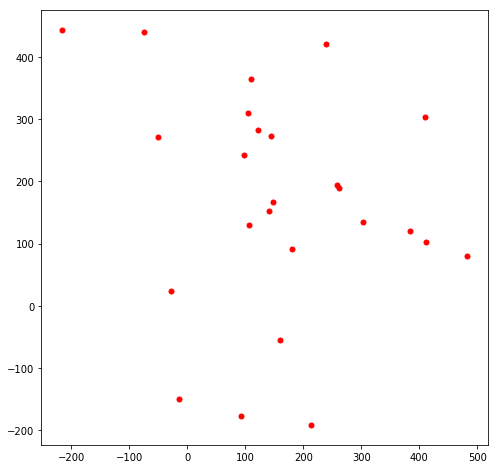

In [18]:
q=F.plot(arrow_width=0.1)

In [20]:
F.Q

array([[ -28.85273348,   23.72718441],
       [ 148.01215787,  166.04534923],
       [ 261.84274437,  188.84269747],
       [ 110.14050512,  364.48836762],
       [ 140.33382786,  152.75479856],
       [ 144.022537  ,  272.58895592],
       [ -14.71193861, -149.76600085],
       [ 410.06858921,  303.41497483],
       [  92.90288389, -176.65243513],
       [ 180.80849931,   91.35927003],
       [-216.27366074,  442.78032338],
       [ 238.35889828,  420.44165773],
       [ 159.45562441,  -55.29659489],
       [ 103.64988087,  310.21971672],
       [ 258.0671893 ,  193.47481145],
       [  97.32127293,  241.52898463],
       [ 384.45910532,  120.20327542],
       [ 121.10348905,  281.83093272],
       [ 302.80421416,  134.0229943 ],
       [ 482.67526262,   79.81331707],
       [ -74.84720184,  439.39320268],
       [ 107.03467896,  130.42098481],
       [ -50.73816763,  271.39229299],
       [ 410.71662061,  101.96403874],
       [ 212.32358781, -190.69735206]])